<a href="https://colab.research.google.com/github/meeyth/Blog-API-in-Golang-using-gin-and-gorm/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IITK/IITK ML projects/proj #5/Property_train.csv')

In [ ]:
df.sample(5)

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
33954,0,WEGU,8979.0,12/14/2010,ZCI3,5755,CAT3,B,GREEN,6527.0,...,A,3315.0,UA42,SILVER,AZ,75111,2005,A,5,4096.0
6944,0,38WH,4702.0,8/25/2009,ZCI3,3900,CAT2,B,missing,3395.0,...,A,2681.0,FIVQ,SILVER,IA,90938,2004,A,5,3805.0
55601,1,5YRM,6037.0,2/5/2009,ZCI3,4960,CAT1,A,missing,4636.0,...,A,3830.0,T04H,BLUE,TX,61875,2004,A,5,3962.0
13066,0,NWHI,4124.0,4/29/2009,PRN0,4175,CAT2,A,missing,3526.0,...,B,2802.0,V3Y1,GREY,CO,63818,2003,A,6,3356.0
6063,0,I27V,11988.0,9/2/2010,ZCI3,7375,CAT2,B,missing,10627.0,...,A,6913.0,WIQA,BLUE,CO,95397,2006,A,4,9449.0


In [ ]:
y = df['Junk']
X = df.drop(['Junk', "ListDate"], axis=1)

In [ ]:
y.value_counts()

,count
Junk,
0,54433
1,7602


In [ ]:
X.sample()

,InteriorsStyle,PriceIndex8,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
17575,5KS5,12106.0,X7IX,6580,CAT1,B,missing,10275.0,0,11769.0,...,A,7194.0,ASW2,BLUE,CA,74050,2006,A,4,7907.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Identify numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [ ]:
print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)

Numerical Variables:
['Junk', 'PriceIndex9', 'ExpeditedListing', 'Zip', 'InsurancePremiumIndex', 'NormalisedPopulation', 'BuildYear', 'PropertyAge']

Categorical Variables:
['InteriorsStyle', 'PriceIndex8', 'ListDate', 'Material', 'Agency', 'AreaIncomeType', 'EnvRating', 'PriceIndex7', 'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'PRIMEUNIT', 'Channel', 'PlotType', 'Architecture', 'PriceIndex3', 'Region', 'PriceIndex5', 'SubModel', 'Facade', 'State', 'RegionType', 'PriceIndex2']


In [ ]:
all_col = df.columns.tolist()

In [ ]:
all_col.remove('Junk')
all_col

['InteriorsStyle',
 'PriceIndex8',
 'ListDate',
 'Material',
 'PriceIndex9',
 'Agency',
 'AreaIncomeType',
 'EnvRating',
 'PriceIndex7',
 'ExpeditedListing',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'PRIMEUNIT',
 'Channel',
 'Zip',
 'InsurancePremiumIndex',
 'PlotType',
 'Architecture',
 'PriceIndex3',
 'Region',
 'PriceIndex5',
 'SubModel',
 'Facade',
 'State',
 'NormalisedPopulation',
 'BuildYear',
 'RegionType',
 'PropertyAge',
 'PriceIndex2']

In [ ]:
price_idx = list(filter(lambda it: it.startswith('PriceIndex'), all_col))

In [ ]:
price_idx

['PriceIndex8',
 'PriceIndex9',
 'PriceIndex7',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'PriceIndex3',
 'PriceIndex5',
 'PriceIndex2']

In [ ]:
numerical_vars_new = numerical_vars + price_idx

In [ ]:
#numerical_vars_new.remove('Junk')
numerical_vars_new.remove('PriceIndex9')


In [ ]:
numerical_vars_new.remove('Zip')

In [ ]:
numerical_vars_new

['Junk',
 'ExpeditedListing',
 'InsurancePremiumIndex',
 'NormalisedPopulation',
 'BuildYear',
 'PropertyAge',
 'PriceIndex8',
 'PriceIndex9',
 'PriceIndex7',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'PriceIndex3',
 'PriceIndex5',
 'PriceIndex2']

In [ ]:
categorical_vars_new = list(filter(lambda it: it not in numerical_vars_new, all_col))

In [ ]:
categorical_vars_new.remove('ListDate')
categorical_vars_new.append("Zip")

In [ ]:
len(categorical_vars_new + numerical_vars_new)

31

In [ ]:
# categorical_vars_new.remove('Junk')

In [ ]:
len(categorical_vars_new + numerical_vars_new)

31

In [ ]:
categorical_vars_new, numerical_vars_new

(['InteriorsStyle',
  'Material',
  'Agency',
  'AreaIncomeType',
  'EnvRating',
  'PRIMEUNIT',
  'Channel',
  'Zip',
  'PlotType',
  'Architecture',
  'Region',
  'SubModel',
  'Facade',
  'State',
  'RegionType',
  'Zip'],
 ['Junk',
  'ExpeditedListing',
  'InsurancePremiumIndex',
  'NormalisedPopulation',
  'BuildYear',
  'PropertyAge',
  'PriceIndex8',
  'PriceIndex9',
  'PriceIndex7',
  'PriceIndex4',
  'PriceIndex1',
  'PriceIndex6',
  'PriceIndex3',
  'PriceIndex5',
  'PriceIndex2'])

In [ ]:
len(X_train.columns.tolist())

29

In [ ]:
X_train[["PriceIndex8"]].value_counts()

,count
PriceIndex8,
0.0,348
missing,226
7478.0,200
7611.0,116
8546.0,90
...,...
20947.0,1
20921.0,1
20914.0,1


In [ ]:
numerical_vars_new, categorical_vars_new

(['Junk',
  'ExpeditedListing',
  'InsurancePremiumIndex',
  'NormalisedPopulation',
  'BuildYear',
  'PropertyAge',
  'PriceIndex8',
  'PriceIndex9',
  'PriceIndex7',
  'PriceIndex4',
  'PriceIndex1',
  'PriceIndex6',
  'PriceIndex3',
  'PriceIndex5',
  'PriceIndex2'],
 ['InteriorsStyle',
  'Material',
  'Agency',
  'AreaIncomeType',
  'EnvRating',
  'PRIMEUNIT',
  'Channel',
  'Zip',
  'PlotType',
  'Architecture',
  'Region',
  'SubModel',
  'Facade',
  'State',
  'RegionType',
  'Zip'])

In [ ]:
numerical_vars_new.remove("Junk")

In [ ]:
for col in numerical_vars_new:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

In [ ]:
X_test[["PriceIndex8"]].value_counts()

,count
PriceIndex8,
0.0,83
missing,46
7478.0,42
7611.0,38
10103.0,24
...,...
16160.0,1
16155.0,1
16153.0,1


In [ ]:
for col in numerical_vars_new:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

In [ ]:
X_test.sample(20)

,InteriorsStyle,PriceIndex8,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
39587,JOMS,12145.0,PRN0,8600,CAT2,B,missing,10361.0,0,12498.0,...,A,9131.0,FIVQ,BLACK,SC,78618,2006,A,3,11109.0
24555,2XWO,11965.0,NYFD,6995,CAT2,B,missing,10979.0,0,0.0,...,A,6880.0,Y29N,SILVER,NC,84686,2007,A,3,0.0
59963,KML6,6402.0,W3HS,5210,CAT3,B,missing,4971.0,0,5729.0,...,A,4140.0,W8B5,BLUE,TX,67684,2005,A,4,4842.0
11654,27O7,10534.0,HE5A,7500,CAT1,A,missing,8783.0,0,10534.0,...,A,7669.0,KXVY,BLUE,FL,62849,2006,A,3,9291.0
4100,WEGU,6065.0,JUNM,3360,CAT3,A,missing,5279.0,0,3732.0,...,A,2407.0,526I,SILVER,TX,87472,2002,A,7,2993.0
42460,QWEV,10178.0,XJ9B,7450,CAT1,A,missing,8364.0,0,9480.0,...,A,5098.0,V42X,WHITE,NC,53743,2005,A,4,8315.0
36711,3MP1,12168.0,X7IX,8455,CAT1,A,missing,10745.0,0,13719.0,...,A,7127.0,ULSL,RED,AZ,45422,2005,A,5,8699.0
31592,WD8F,12086.0,1QJ5,7000,CAT3,C,missing,10918.0,0,11561.0,...,A,6553.0,P0SX,RED,FL,96097,2004,A,6,7437.0
39536,HO2S,4688.0,NYFD,4010,CAT2,A,missing,3674.0,0,4589.0,...,A,2939.0,CULD,WHITE,TX,77920,2004,A,5,3786.0
16826,GK4G,9609.0,HE5A,5850,OTHER,B,missing,7376.0,0,8037.0,...,A,3997.0,FIVQ,RED,NC,37476,2006,B,4,4720.0


In [ ]:
for col in numerical_vars_new:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.iloc[44062]

,44062
Junk,0
InteriorsStyle,J0SD
PriceIndex8,NaN
ListDate,3/25/2009
Material,PRN0
PriceIndex9,7100
Agency,CAT2
AreaIncomeType,B
EnvRating,missing
PriceIndex7,NaN


In [ ]:
df.tail()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
62030,1,DPIW,15110.0,3/31/2010,1PUV,8745,CAT3,missing,missing,13468.0,...,A,10012.0,9D54,WHITE,CA,87562,2006,A,4,11162.0
62031,0,YOC7,9456.0,10/20/2010,RRJQ,5360,OTHER,B,missing,8543.0,...,A,5439.0,E75G,GOLD,TN,80201,2007,B,3,6147.0
62032,1,CNKZ,8730.0,5/19/2009,ZCI3,6670,CAT3,A,missing,7217.0,...,A,6219.0,UA42,MAROON,IN,65983,2005,A,4,7620.0
62033,0,RELA,8546.0,4/30/2009,X7IX,6600,CAT1,A,missing,7316.0,...,A,6311.0,ASW2,SILVER,TX,59780,2006,A,3,7450.0
62034,0,DUFA,12658.0,11/3/2010,IKAF,8700,CAT2,B,missing,12002.0,...,A,8930.0,FIVQ,GOLD,OK,38703,2009,A,1,9196.0


In [ ]:
# Define pre-processing for numerical columns  # categorical_vars_new, numerical_vars_new
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define pre-processing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # ensure output is dense
])

# Combine pre-processing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_vars_new),
        ('cat', categorical_transformer, categorical_vars_new)
    ])

# Pre-process the data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Get the feature names after one-hot encoding
# Get original numerical column names
numerical_features = numerical_vars_new

# Get new categorical column names from the one-hot encoder
categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_vars_new)

# Combine all feature names
feature_names = list(numerical_features) + list(categorical_features)

# Recreate DataFrame with transformed data and original column names
X_train = pd.DataFrame(X_train_transformed, columns=feature_names)
X_test = pd.DataFrame(X_test_transformed, columns=feature_names)

In [ ]:
feature_names

['ExpeditedListing',
 'InsurancePremiumIndex',
 'NormalisedPopulation',
 'BuildYear',
 'PropertyAge',
 'PriceIndex8',
 'PriceIndex9',
 'PriceIndex7',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'PriceIndex3',
 'PriceIndex5',
 'PriceIndex2',
 'InteriorsStyle_00G0',
 'InteriorsStyle_06M5',
 'InteriorsStyle_07LY',
 'InteriorsStyle_09YA',
 'InteriorsStyle_0A6Q',
 'InteriorsStyle_0AEV',
 'InteriorsStyle_0BJ2',
 'InteriorsStyle_0C8Z',
 'InteriorsStyle_0K8S',
 'InteriorsStyle_0L1M',
 'InteriorsStyle_0LXU',
 'InteriorsStyle_0MJJ',
 'InteriorsStyle_0P4O',
 'InteriorsStyle_0P8D',
 'InteriorsStyle_0PSG',
 'InteriorsStyle_0PTF',
 'InteriorsStyle_0Q6J',
 'InteriorsStyle_0S2O',
 'InteriorsStyle_0S7O',
 'InteriorsStyle_0TT8',
 'InteriorsStyle_0TXX',
 'InteriorsStyle_0U0W',
 'InteriorsStyle_0UL2',
 'InteriorsStyle_0VBX',
 'InteriorsStyle_0XN8',
 'InteriorsStyle_0YLW',
 'InteriorsStyle_11J3',
 'InteriorsStyle_137O',
 'InteriorsStyle_14CR',
 'InteriorsStyle_14DE',
 'InteriorsStyle_158T',
 'Interior

In [ ]:
X_train.sample(10)

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
3513,-0.157682,6.830211,0.724157,-1.352686,1.065803,-1.413778,-1.205306,-1.298508,-1.789357,-1.492168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27077,-0.157682,-1.283429,-1.063748,0.380371,-0.689130,-1.095299,-0.892093,-1.175049,-1.025504,-0.665312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4974,-0.157682,-0.134536,1.504612,0.380371,-0.104152,0.094153,-0.434972,0.025836,0.095245,-0.025531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17780,-0.157682,-1.283429,-0.962078,0.380371,-0.104152,-0.419288,-1.287137,-0.697417,-0.582623,-0.948354,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39984,-0.157682,-0.428401,-0.135277,-0.775001,0.480825,-0.046014,0.211206,-0.042860,-0.670963,-0.432075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3581,-0.157682,1.155478,0.301844,0.958056,-1.274107,0.977538,0.109624,1.017393,-0.085264,0.475766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20258,6.341866,-0.010018,0.454041,0.380371,-0.104152,0.255512,0.219671,0.340154,0.219511,-0.244190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13463,-0.157682,-0.010018,0.439438,0.958056,-0.689130,1.207315,0.267641,1.464890,0.614983,0.422721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22242,-0.157682,0.705550,-0.178468,0.958056,-0.689130,0.336342,0.431302,0.368993,0.679472,0.523547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43278,-0.157682,-0.151139,-1.537821,-0.197315,-0.104152,0.659665,0.546993,0.707937,-0.232204,0.055049,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# numerical_vars_new, categorical_vars_new.remove("ListDate")

In [ ]:
X_test.sample(10)

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
573,-0.157682,-1.203737,-1.893085,-0.197315,-0.104152,-1.236374,-0.937241,-1.207777,-1.297594,-1.101011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3421,-0.157682,-0.318824,-0.910385,-0.197315,0.480825,0.505572,0.473628,0.474629,0.575230,0.260751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,-0.157682,1.527374,-0.459690,-1.930372,1.650781,-1.952346,-1.374611,-1.963110,-1.812031,-1.649684,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12237,-0.157682,-0.913193,-0.658026,0.380371,-0.689130,-1.557578,-1.464906,-1.491634,-1.183929,-0.917580,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1485,-0.157682,-0.737207,-1.856750,0.380371,-0.689130,-1.079254,-0.759472,-1.179586,-0.962782,-0.743057,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8540,-0.157682,1.451002,1.046307,-0.775001,1.065803,0.920624,1.122628,0.795427,0.872644,0.668105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3624,-0.157682,0.293808,-0.058013,-1.352686,1.065803,-1.166745,-0.087898,-1.191251,-1.154482,-0.853602,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5261,-0.157682,0.373500,0.944637,-0.197315,-0.104152,0.237953,0.826345,0.164849,0.048719,0.528406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10099,-0.157682,-1.236942,-0.771694,0.958056,-0.689130,0.610016,0.132198,0.772421,0.598493,0.334852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6134,-0.157682,-0.318824,-1.407837,1.535742,-1.859085,-0.392042,-0.245915,-0.149792,-0.466602,0.243339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49628, 2366), (12407, 2366), (49628,), (12407,))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(Junk
 0    43546
 1     6082
 Name: count, dtype: int64,
 Junk
 0    10887
 1     1520
 Name: count, dtype: int64)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
Junk,
0,43546
1,43546


In [ ]:
X_train_resampled.shape, X_test.shape, y_train_resampled.shape, y_test.shape

((87092, 2366), (12407, 2366), (87092,), (12407,))

In [ ]:
X_test.head()

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
0,-0.157682,0.184232,0.362449,0.380371,-0.104152,0.448355,0.451054,0.478194,0.830240,0.568089,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.157682,-0.044883,-1.018226,-0.197315,0.480825,1.196417,0.685258,1.159970,0.978064,0.644215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.157682,1.155478,0.385964,0.380371,-0.689130,-0.220693,0.318432,-0.274547,-0.093215,0.344975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.157682,-0.104652,-0.539148,0.380371,-0.104152,1.045957,1.588214,0.944161,0.861454,0.701309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.157682,-1.177173,-0.094623,0.958056,-0.689130,0.384477,-0.141511,0.401397,0.234529,0.294765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Confusion Matrix:
[[10753   134]
 [ 1171   349]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10887
           1       0.72      0.23      0.35      1520

    accuracy                           0.89     12407
   macro avg       0.81      0.61      0.65     12407
weighted avg       0.88      0.89      0.87     12407



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC AUC Score: 0.75


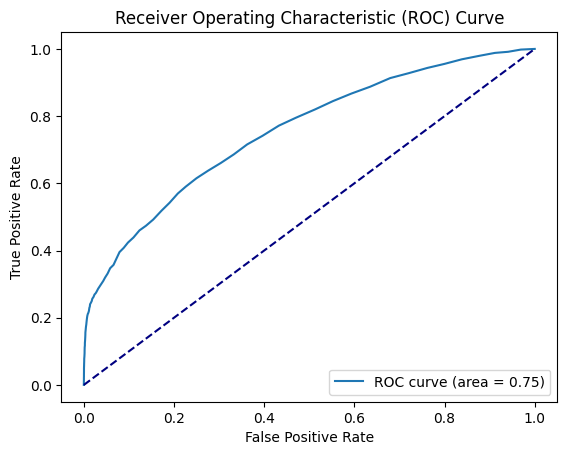

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
df.describe()

,Junk,PriceIndex8,PriceIndex9,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,PriceIndex6,Zip,InsurancePremiumIndex,PriceIndex3,PriceIndex5,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex2
count,62035.000000,61763.000000,62035.000000,61763.000000,62035.000000,62021.000000,62021.000000,61763.000000,62035.000000,62035.000000,62021.000000,61763.000000,62035.000000,62035.000000,62035.00000,62021.000000
mean,0.122544,10148.337678,6731.444765,8778.171834,0.024680,9851.665936,6131.088260,7393.599485,58038.149109,1277.286854,8499.050031,6135.062222,71462.694302,2005.347739,4.17171,7375.028781
std,0.327915,3308.139668,1766.130806,3090.391229,0.155148,3388.012989,2463.119811,2683.833484,26143.635828,600.787708,3159.760520,2433.250922,14583.079578,1.730014,1.70878,2722.678113
min,0.000000,0.000000,225.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2764.000000,462.000000,0.000000,0.000000,4825.000000,2001.000000,0.00000,0.000000
25%,0.000000,7794.500000,5430.000000,6540.000000,0.000000,7489.000000,4273.000000,5421.000000,32124.000000,837.000000,6279.000000,4278.000000,61803.500000,2004.000000,3.00000,5404.000000
50%,0.000000,10103.000000,6705.000000,8736.000000,0.000000,9794.000000,6104.000000,7323.000000,73108.000000,1155.000000,8451.000000,6069.000000,73361.000000,2005.000000,4.00000,7311.000000
75%,0.000000,12310.000000,7900.000000,10911.000000,0.000000,12089.000000,7765.000000,9012.000000,80022.000000,1623.000000,10657.000000,7737.000000,82370.500000,2007.000000,5.00000,9021.000000
max,1.000000,41062.000000,38785.000000,39080.000000,1.000000,41482.000000,35722.000000,36859.000000,99224.000000,7498.000000,39080.000000,35722.000000,115717.000000,2010.000000,9.00000,36859.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62035 entries, 0 to 62034
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Junk                   62035 non-null  int64  
 1   InteriorsStyle         62035 non-null  object 
 2   PriceIndex8            61763 non-null  float64
 3   ListDate               62035 non-null  object 
 4   Material               62035 non-null  object 
 5   PriceIndex9            62035 non-null  int64  
 6   Agency                 62035 non-null  object 
 7   AreaIncomeType         62035 non-null  object 
 8   EnvRating              62035 non-null  object 
 9   PriceIndex7            61763 non-null  float64
 10  ExpeditedListing       62035 non-null  int64  
 11  PriceIndex4            62021 non-null  float64
 12  PriceIndex1            62021 non-null  float64
 13  PriceIndex6            61763 non-null  float64
 14  PRIMEUNIT              62035 non-null  object 
 15  Ch

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IITK/IITK ML projects/proj #5/Property_test_share.csv')
test_df.shape

(10948, 30)

In [ ]:
test_df.sample(5)

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
5501,YOC7,9312.0,12/31/2009,HE5A,5935,OTHER,A,missing,8000.0,0,...,A,4865.0,E75G,BLACK,NC,67914,2006,B,4,5930.0
10541,9F84,10775.0,9/28/2009,4ZHP,7000,CAT2,A,missing,8649.0,0,...,A,5772.0,XML5,BLUE,NC,84333,2005,A,4,8512.0
3522,3MP1,15373.0,5/18/2010,C8A4,8075,CAT1,A,missing,13796.0,1,...,A,9809.0,3IAL,WHITE,UT,98870,2007,A,3,11944.0
6494,D2DH,9841.0,11/30/2010,C8A4,6625,CAT1,A,GREEN,8315.0,0,...,A,5299.0,KT8F,BLUE,TX,86927,2005,A,5,6445.0
9767,O98V,11953.0,9/4/2009,X7IX,7500,CAT1,A,missing,10053.0,0,...,A,8845.0,IAQO,SILVER,GA,70789,2007,A,2,10738.0


In [ ]:
X_train.sample(5)

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
39909,-0.157682,0.373500,1.122131,-0.197315,-0.104152,0.022102,0.205563,-0.064246,0.046363,0.476576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45514,-0.157682,0.584352,1.638230,-0.775001,0.480825,-0.652698,0.789663,-0.627425,-0.146514,0.288286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16211,-0.157682,6.332136,0.788532,-0.197315,-0.104152,-0.906088,-1.171445,-1.106029,-1.427455,-1.220464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2116,-0.157682,0.373500,0.629342,1.535742,-1.274107,1.097422,0.578032,1.270467,1.099385,0.966940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6899,-0.157682,-0.971302,-1.761524,1.535742,-1.274107,0.470757,0.563923,0.742285,0.507208,0.674179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10948 entries, 0 to 10947
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   InteriorsStyle         10948 non-null  object
 1   PriceIndex8            10948 non-null  object
 2   ListDate               10948 non-null  object
 3   Material               10948 non-null  object
 4   PriceIndex9            10948 non-null  int64 
 5   Agency                 10948 non-null  object
 6   AreaIncomeType         10948 non-null  object
 7   EnvRating              10948 non-null  object
 8   PriceIndex7            10948 non-null  object
 9   ExpeditedListing       10948 non-null  int64 
 10  PriceIndex4            10948 non-null  object
 11  PriceIndex1            10948 non-null  object
 12  PriceIndex6            10948 non-null  object
 13  PRIMEUNIT              10948 non-null  object
 14  Channel                10948 non-null  object
 15  Zip                

In [ ]:
test_df.drop("ListDate", axis=1, inplace=True)

In [ ]:
test_df.sample(5)

,InteriorsStyle,PriceIndex8,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,PriceIndex4,...,Region,PriceIndex5,SubModel,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2
10462,T67A,14573.0,X7IX,8470,CAT1,A,missing,13003.0,1,14358.0,...,A,8755.0,SBY1,BROWN,IN,86430,2008,A,2,10664.0
9890,CKUI,14647.0,NYFD,9420,CAT2,A,missing,13374.0,0,13084.0,...,A,9813.0,3ZS5,RED,OK,55604,2006,A,3,9430.0
6675,QS4E,2951.0,RRJQ,5800,OTHER,B,missing,2314.0,0,6517.0,...,A,1680.0,FIVQ,GOLD,FL,54339,2006,B,3,5571.0
4241,BX7I,7250.0,IKAF,6200,CAT2,B,missing,5938.0,0,6439.0,...,A,5035.0,UDMC,BLUE,SC,51355,2005,A,4,5499.0
5011,ELJV,10581.0,C8A4,7800,CAT1,A,missing,9005.0,0,10581.0,...,A,7875.0,FG74,SILVER,NC,72968,2005,A,4,9334.0


In [ ]:
for col in numerical_vars_new:
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

In [ ]:
test_df.shape

(10948, 29)

In [ ]:
# Pre-process the data
test_df_transformed = preprocessor.transform(test_df)

# Get the feature names after one-hot encoding
# Get original numerical column names
numerical_features = numerical_vars_new

# Get new categorical column names from the one-hot encoder
categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_vars_new)

# Combine all feature names
feature_names = list(numerical_features) + list(categorical_features)

# Recreate DataFrame with transformed data and original column names
test_df_transformed = pd.DataFrame(test_df_transformed, columns=feature_names)

In [ ]:
test_df_transformed.sample(10)

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
2730,-0.157682,-0.921495,0.946693,-0.775001,0.480825,-0.797103,-0.133046,-0.808238,-0.459829,0.004839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2981,-0.157682,-0.398516,0.234589,0.380371,-0.689130,0.439576,0.400263,0.387139,0.740133,1.242289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10617,-0.157682,1.949077,0.621869,-1.930372,1.650781,-1.967786,-1.487480,-1.983848,-1.827049,-1.673575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6668,-0.157682,1.029299,-0.563211,-0.775001,0.480825,-1.543954,-0.638137,-1.636480,-0.529913,-0.681914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2794,-0.157682,0.124463,1.830671,-1.930372,2.235758,-1.657178,-1.134763,-1.511401,-1.137403,-1.608382,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5266,-0.157682,1.949077,1.059470,-1.930372,2.235758,-0.347237,-0.443437,-0.618027,-0.299638,-0.981558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4366,-0.157682,1.155478,0.461994,0.958056,-0.689130,0.739587,0.713476,0.812925,0.877944,0.758404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6259,-0.157682,-0.134536,1.581328,-0.775001,1.065803,-0.152577,-0.324924,-0.086281,-0.130907,-0.447462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
228,-0.157682,-0.913193,-0.485330,0.958056,-0.689130,-0.007566,-0.423685,0.158368,0.163562,-0.170494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1500,-0.157682,0.184232,0.410781,-0.775001,0.480825,-0.810121,-0.923132,-0.832865,-1.237817,-1.047561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.sample(10)

,ExpeditedListing,InsurancePremiumIndex,NormalisedPopulation,BuildYear,PropertyAge,PriceIndex8,PriceIndex9,PriceIndex7,PriceIndex4,PriceIndex1,...,Zip_92337,Zip_92504,Zip_92807,Zip_94544,Zip_95673,Zip_97060,Zip_97217,Zip_97402,Zip_98064,Zip_99224
1393,-0.157682,0.373500,0.625571,-0.775001,1.065803,-0.692962,-1.086793,-0.616407,-0.568488,-1.079145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5685,-0.157682,0.805165,1.262537,-0.197315,0.480825,-0.323018,-0.889272,-0.298850,0.005138,-0.519134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3258,-0.157682,0.184232,0.481053,0.958056,-0.689130,1.741040,1.706727,1.821656,1.912120,1.818902,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3947,6.341866,-0.398516,0.023844,-0.775001,1.065803,-0.628479,-0.364428,-0.608630,0.925648,-0.687583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2870,-0.157682,0.589333,0.893356,-0.197315,0.480825,1.442845,0.730406,1.148953,0.977769,0.603722,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,-0.157682,0.823428,1.796872,-0.197315,0.480825,-0.161054,-0.753828,-0.001383,-0.346753,-0.583922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6351,-0.157682,1.155478,0.191535,0.380371,-0.104152,0.230385,0.372045,0.267569,0.179169,-0.207747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6463,-0.157682,-0.594426,0.424219,-0.775001,1.065803,-0.720814,-1.741437,-0.780371,-0.567310,-1.152841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11320,-0.157682,0.157668,1.055151,-0.197315,0.480825,-0.376602,-0.020176,-0.390553,-0.008997,-0.314242,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7982,-0.157682,0.572730,0.008350,-0.197315,-0.104152,-0.744427,-0.694572,-0.934937,-0.424787,-0.253503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submissions=pd.DataFrame({'Junk':model.predict_proba(test_df_transformed)[:,1]})

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
submissions.to_csv('/content/drive/MyDrive/Colab Notebooks/IITK/IITK ML projects/proj #5/sample_submission.csv',index=False)

In [ ]:
submissions.shape

(10948, 1)

In [ ]:
test_df.shape

(10948, 29)

In [ ]:
test_df_transformed.shape

(10948, 2366)

In [ ]:
X_train.shape

(49628, 2366)

In [ ]:
X_test.shape

(12407, 2366)

In [ ]:
submissions

,Junk
0,0.16
1,0.13
2,0.00
3,0.17
4,0.32
...,...
10943,0.01
10944,0.19
10945,0.06
10946,0.14
